# EDA

- Merge opponent stats
- Add advanced stats:
 - PACE, OFFrtg, DEFrtg
- Delete outliers 
- Stats comparison
- Individual team trends

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
first_3 = pd.read_csv("data/first_3_clean.csv")
NBA_4th = pd.read_csv("data/NBA_4th_clean.csv")

In [3]:
first_3.head()

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,COURT
0,WAS,WAS @ BOS,2024-04-14,L,36,89,35,76,0.460526,11,...,7,20,27,24,10,3,2,11,-18,0
1,UTA,UTA @ GSW,2024-04-14,L,36,89,35,66,0.530303,11,...,10,26,36,17,14,5,4,12,-6,0
2,TOR,TOR @ MIA,2024-04-14,L,36,71,28,66,0.424242,5,...,10,16,26,16,16,4,3,17,-23,0
3,SAS,SAS vs. DET,2024-04-14,W,36,93,37,71,0.521127,13,...,10,36,46,26,12,8,2,11,30,1
4,SAC,SAC vs. POR,2024-04-14,W,36,99,34,65,0.523077,13,...,9,29,38,25,9,9,5,11,41,1


In [4]:
NBA_4th.head()

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,COURT
0,WAS,WAS @ BOS,2024-04-14,L,12,33,14,27,51.9,3,...,1,8,9,9,2,6,2,5,8,0
1,UTA,UTA @ GSW,2024-04-14,L,12,27,11,23,47.8,3,...,4,8,12,5,6,1,1,8,-1,0
2,TOR,TOR @ MIA,2024-04-14,L,12,32,10,24,41.7,4,...,3,12,15,7,3,2,0,4,8,0
3,SAS,SAS vs. DET,2024-04-14,W,12,30,12,20,60.0,2,...,2,6,8,7,2,1,1,6,-2,1
4,SAC,SAC vs. POR,2024-04-14,W,12,22,9,22,40.9,0,...,4,9,13,4,5,2,1,8,-2,1


## Merge opponent stats

In [5]:
NBA_4th["Opponent"] = NBA_4th["MATCH UP"].apply(lambda x:  str(x).split(" ")[2] )


In [6]:
Home = NBA_4th[NBA_4th["COURT"] == 1]
Home.head(10)

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,TOV,STL,BLK,PF,+/-,COURT,Opponent
3,SAS,SAS vs. DET,2024-04-14,W,12,30,12,20,60.0,2,...,6,8,7,2,1,1,6,-2,1,DET
4,SAC,SAC vs. POR,2024-04-14,W,12,22,9,22,40.9,0,...,9,13,4,5,2,1,8,-2,1,POR
7,PHI,PHI vs. BKN,2024-04-14,W,12,26,11,24,45.8,2,...,12,17,8,7,3,0,5,4,1,BKN
8,ORL,ORL vs. MIL,2024-04-14,W,12,33,11,18,61.1,5,...,9,11,8,5,5,1,4,16,1,MIL
9,OKC,OKC vs. DAL,2024-04-14,W,12,27,11,21,52.4,5,...,8,9,9,5,1,2,3,-2,1,DAL
10,NYK,NYK vs. CHI,2024-04-14,W,12,33,12,21,57.1,5,...,8,13,8,3,0,1,3,6,1,CHI
11,NOP,NOP vs. LAL,2024-04-14,L,12,31,13,22,59.1,4,...,8,12,8,6,2,1,7,6,1,LAL
12,MIN,MIN vs. PHX,2024-04-14,L,12,28,11,25,44.0,1,...,4,11,7,2,1,1,3,-8,1,PHX
14,MIA,MIA vs. TOR,2024-04-14,W,12,24,10,24,41.7,1,...,9,12,4,5,1,2,5,-8,1,TOR
15,MEM,MEM vs. DEN,2024-04-14,L,12,36,14,22,63.6,4,...,8,9,8,3,1,1,5,4,1,DEN


In [7]:
Away = NBA_4th[NBA_4th["COURT"] == 0]
Away.head(10)

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,TOV,STL,BLK,PF,+/-,COURT,Opponent
0,WAS,WAS @ BOS,2024-04-14,L,12,33,14,27,51.9,3,...,8,9,9,2,6,2,5,8,0,BOS
1,UTA,UTA @ GSW,2024-04-14,L,12,27,11,23,47.8,3,...,8,12,5,6,1,1,8,-1,0,GSW
2,TOR,TOR @ MIA,2024-04-14,L,12,32,10,24,41.7,4,...,12,15,7,3,2,0,4,8,0,MIA
5,POR,POR @ SAC,2024-04-14,L,12,24,8,24,33.3,3,...,9,15,5,5,3,1,5,2,0,SAC
6,PHX,PHX @ MIN,2024-04-14,W,12,36,14,21,66.7,5,...,7,10,9,3,2,0,3,8,0,MIN
13,MIL,MIL @ ORL,2024-04-14,L,12,17,8,19,42.1,1,...,4,5,6,6,4,0,5,-16,0,ORL
16,LAL,LAL @ NOP,2024-04-14,W,12,25,6,18,33.3,0,...,7,10,3,4,3,1,2,-6,0,NOP
19,HOU,HOU @ LAC,2024-04-14,W,12,31,14,26,53.8,2,...,16,18,10,3,1,2,1,9,0,LAC
21,DET,DET @ SAS,2024-04-14,L,12,32,11,21,52.4,4,...,6,10,5,2,0,0,4,2,0,SAS
22,DEN,DEN @ MEM,2024-04-14,W,12,32,11,20,55.0,2,...,8,9,8,4,3,0,6,-4,0,MEM


In [8]:
Home = Home.sort_values(by = ["GAME DATE", "TEAM"], ascending = False).reset_index()

In [9]:
Away = Away.sort_values(by = ["GAME DATE", "Opponent"], ascending = False).reset_index()

In [10]:
Away.columns

Index(['index', 'TEAM', 'MATCH UP', 'GAME DATE', 'W/L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-', 'COURT', 'Opponent'],
      dtype='object')

In [11]:
Home[["OppPTS","OppFGM",'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%', 'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB',
       'OppREB', 'OppAST', 'OppTOV', 'OppSTL', 'OppBLK', 'OppPF',]] = Away[["PTS","FGM",'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',]]

Away[["OppPTS","OppFGM",'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%', 'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB',
       'OppREB', 'OppAST', 'OppTOV', 'OppSTL', 'OppBLK', 'OppPF',]] = Home[["PTS","FGM",'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',]]

In [12]:
temp = pd.concat([Home, Away]).sort_values(by = "index").reset_index(drop = True)


In [13]:
check = temp["PTS"] - NBA_4th["PTS"]
check.unique()

array([0], dtype=int64)

In [14]:
first_3["Opponent"] = first_3["MATCH UP"].apply(lambda x:  str(x).split(" ")[2])
Home1 = first_3[first_3["COURT"] == 1]
Away1 = first_3[first_3["COURT"] == 0]

In [15]:
Home1 = Home1.sort_values(by = ["GAME DATE","TEAM"], ascending = False).reset_index()
Away1 = Away1.sort_values(by = ["GAME DATE","Opponent"], ascending = False).reset_index()

In [16]:
Home1[["OppPTS","OppFGM",'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%', 'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB',
       'OppREB', 'OppAST', 'OppTOV', 'OppSTL', 'OppBLK', 'OppPF',]] = Away1[["PTS","FGM",'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',]]

Away1[["OppPTS","OppFGM",'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%', 'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB',
       'OppREB', 'OppAST', 'OppTOV', 'OppSTL', 'OppBLK', 'OppPF',]] = Home1[["PTS","FGM",'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',]]

In [17]:
temp1 = pd.concat([Home1,Away1]).sort_values(by = "index").reset_index(drop = True)
check = temp1["PTS"] - first_3["PTS"]
check.unique()

array([0], dtype=int64)

In [18]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [19]:
temp1.head()

,index,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,COURT,Opponent,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF
0,0,WAS,WAS @ BOS,2024-04-14,L,36,89,35,76,0.460526,11,32,0.343750,8,8,1.000000,7,20,27,24,10,3,2,11,-18,0,BOS,107,40,68,0.588235,15,28,0.535714,12,16,0.750000,8,27,35,23,9,8,10,11
1,1,UTA,UTA @ GSW,2024-04-14,L,36,89,35,66,0.530303,11,27,0.407407,8,14,0.571429,10,26,36,17,14,5,4,12,-6,0,GSW,95,35,71,0.492958,13,34,0.382353,12,14,0.857143,7,22,29,26,7,7,3,11
2,2,TOR,TOR @ MIA,2024-04-14,L,36,71,28,66,0.424242,5,24,0.208333,10,13,0.769231,10,16,26,16,16,4,3,17,-23,0,MIA,94,36,63,0.571429,8,23,0.347826,14,15,0.933333,10,24,34,25,14,12,5,11
3,3,SAS,SAS vs. DET,2024-04-14,W,36,93,37,71,0.521127,13,28,0.464286,6,8,0.750000,10,36,46,26,12,8,2,11,30,1,DET,63,25,71,0.352113,4,24,0.166667,9,13,0.692308,7,23,30,12,12,7,3,5
4,4,SAC,SAC vs. POR,2024-04-14,W,36,99,34,65,0.523077,13,29,0.448276,18,21,0.857143,9,29,38,25,9,9,5,11,41,1,POR,58,23,74,0.310811,4,34,0.117647,8,11,0.727273,17,22,39,13,13,8,1,14


## Advanced stats

- Possession = 0.5 * ((FGA + 0.4 *  FTA - 1.07 * (OREB / (OREB + Opp DREB)) * (FGA -  FG) +  TOV) + (Opp FGA + 0.4 * Opp 
FTA - 1.07 * (Opp OREB / (Opp OREB +  DRB)) * (Opp FGA - Opp FGM) + Opp TOV))

- Pace Calculation Formula = [240 / (Team Minutes)] * (Possessionteam + Possessionopponent) / 2

reference: https://www.basketball-reference.com/about/glossary.html#poss

In [20]:
temp["Pos"] = 0.5*((temp.FGA+0.4*temp.FTA-1.07*(temp.OREB/(temp.OREB+temp.OppDREB))*(temp.FGA-temp.FGM)+temp.TOV)+(temp.OppFGA+0.4*temp.OppFTA-1.07*(temp.OppOREB/(temp.OppOREB+temp.DREB))*(temp.OppFGA-temp.OppFGM)+temp.OppTOV))

# Opponent

temp["OppPos"] = temp["Pos"]

In [21]:
temp["Pace"] = (240 / 60) * (temp.Pos + temp.OppPos) / 2

In [22]:
temp["OFFRTG"] = (temp.PTS / temp.Pos) * 100
temp["DEFRTG"] = (temp.OppPTS / temp.OppPos) * 100

In [23]:
temp.head()

,index,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,COURT,Opponent,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF,Pos,OppPos,Pace,OFFRTG,DEFRTG
0,0,WAS,WAS @ BOS,2024-04-14,L,12,33,14,27,51.9,3,6,50.0,2,2,100.0,1,8,9,9,2,6,2,5,8,0,BOS,25,11,21,52.4,1,4,25.0,2,5,40.0,2,11,13,6,8,2,5,2,28.750417,28.750417,115.001667,114.780945,86.955262
1,1,UTA,UTA @ GSW,2024-04-14,L,12,27,11,23,47.8,3,7,42.9,2,2,100.0,4,8,12,5,6,1,1,8,-1,0,GSW,28,10,23,43.5,1,9,11.1,7,9,77.8,5,8,13,9,2,3,3,3,24.385000,24.385000,97.540000,110.723806,114.824687
2,2,TOR,TOR @ MIA,2024-04-14,L,12,32,10,24,41.7,4,10,40.0,8,8,100.0,3,12,15,7,3,2,0,4,8,0,MIA,24,10,24,41.7,1,13,7.7,3,4,75.0,3,9,12,4,5,1,2,5,27.029500,27.029500,108.118000,118.389167,88.791876
3,3,SAS,SAS vs. DET,2024-04-14,W,12,30,12,20,60.0,2,6,33.3,4,6,66.7,2,6,8,7,2,1,1,6,-2,1,DET,32,11,21,52.4,4,9,44.4,6,7,85.7,4,6,10,5,2,0,0,4,21.890000,21.890000,87.560000,137.048881,146.185473
4,4,SAC,SAC vs. POR,2024-04-14,W,12,22,9,22,40.9,0,5,0.0,4,6,66.7,4,9,13,4,5,2,1,8,-2,1,POR,24,8,24,33.3,3,11,27.3,5,6,83.3,6,9,15,5,5,3,1,5,24.836000,24.836000,99.344000,88.581092,96.633919


In [24]:
temp1["Pos"] = 0.5*((temp1.FGA+0.4*temp1.FTA-1.07*(temp1.OREB/(temp1.OREB+temp1.OppDREB))*(temp1.FGA-temp1.FGM)+temp1.TOV)+(temp1.OppFGA+0.4*temp1.OppFTA-1.07*(temp1.OppOREB/(temp1.OppOREB+temp1.DREB))*(temp1.OppFGA-temp1.OppFGM)+temp1.OppTOV))
temp1["OppPos"] = temp1["Pos"]

In [25]:
temp1["Pace"] = (240 / 180) * (temp1.Pos + temp1.OppPos) / 2

In [26]:
temp1["OFFRTG"] = (temp1.PTS / temp1.Pos) * 100
temp1["DEFRTG"] = (temp1.OppPTS / temp1.OppPos) * 100

## Outliers

- I don´t want include games with big margin of victory, because in blowouts starters will be benchend early. 
- Big leads in the 3rd are also problematic, in a tough NBA schedule Teams don´t often


<AxesSubplot:xlabel='+/-', ylabel='Density'>

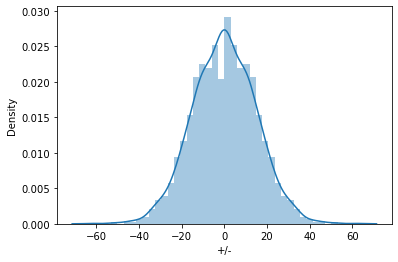

In [27]:
#"+/-" tell us the score difference in the quarter
sns.distplot(temp1["+/-"])

This boxplot show´s that a team rarely outscore their opponent with more than 20 points in the 4th quarter

<AxesSubplot:xlabel='+/-'>

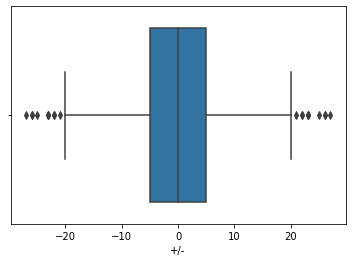

In [28]:
sns.boxplot(temp["+/-"])

<AxesSubplot:xlabel='+/-'>

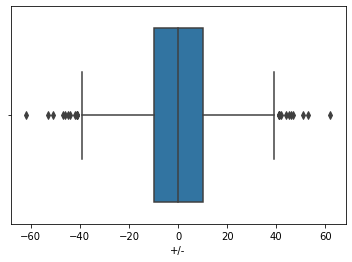

In [29]:
sns.boxplot(temp1["+/-"])

Margin is the final score difference of a game because I don´t include the overtime period, Margin = 0 is possible

In [30]:
temp["Margin"] = temp["+/-"] + temp1["+/-"]
temp1["Margin"] = temp["+/-"] + temp1["+/-"]

<AxesSubplot:xlabel='Margin', ylabel='Density'>

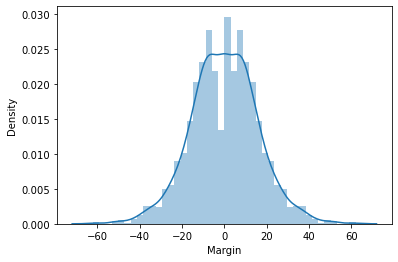

In [31]:
sns.distplot(temp["Margin"])

Some outlier scores with big margins

<AxesSubplot:xlabel='Margin'>

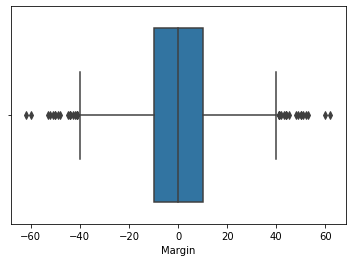

In [32]:
sns.boxplot(temp["Margin"])

In [33]:
score_matrix = temp1.pivot_table(index=[pd.cut(temp1["+/-"], [0,3,6,9,12,15,20,25,30,40,60],include_lowest=True)],columns=pd.cut(temp1.Margin, [0,3,6,9,12,15,18,21,25,30,40,60],include_lowest=True),values="index",aggfunc="count")
score_matrix

Margin,"(-0.001, 3.0]","(3.0, 6.0]","(6.0, 9.0]","(9.0, 12.0]","(12.0, 15.0]","(15.0, 18.0]","(18.0, 21.0]","(21.0, 25.0]","(25.0, 30.0]","(30.0, 40.0]","(40.0, 60.0]"
+/-,,,,,,,,,,,
"(-0.001, 3.0]",71,32,34,28,11,8,2,1,0,0,0
"(3.0, 6.0]",32,25,42,13,9,6,2,0,0,0,0
"(6.0, 9.0]",24,21,26,28,14,15,7,5,0,0,0
"(9.0, 12.0]",12,21,32,27,18,18,9,5,4,3,0
"(12.0, 15.0]",11,12,15,19,19,9,12,8,7,2,0
"(15.0, 20.0]",7,8,17,21,23,26,21,17,13,6,1
"(20.0, 25.0]",0,1,6,12,15,12,6,18,9,16,1
"(25.0, 30.0]",0,0,2,2,2,7,8,7,14,6,1
"(30.0, 40.0]",0,0,0,0,1,0,3,5,7,15,9


Games where teams lead in the 3rd quarter and also won the game or overtime.
Note: zero includes duplicate values because in a match with a tied score, both teams have "+/-" or "Margin" of 0  

<AxesSubplot:xlabel='Margin', ylabel='+/-'>

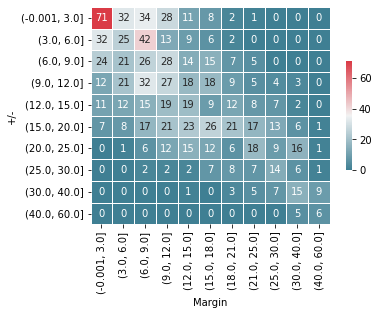

In [34]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(score_matrix, cmap = cmap, annot = True,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

Table of teams who lead in the 3rd quarter but lost the game or overtime

In [35]:
temp1.pivot_table(index=[pd.cut(temp1["+/-"], [0,3,6,9,12,15,20,25,30,40,60],include_lowest=True)],columns=pd.cut(temp1.Margin, [-30,-20,-15,-12,-9,-6,-3,-1,-0],include_lowest=True),values="index",aggfunc="count")

Margin,"(-30.001, -20.0]","(-20.0, -15.0]","(-15.0, -12.0]","(-12.0, -9.0]","(-9.0, -6.0]","(-6.0, -3.0]","(-3.0, -1.0]","(-1.0, 0.0]"
+/-,,,,,,,,
"(-0.001, 3.0]",0,4,6,14,26,21,23,28
"(3.0, 6.0]",0,1,2,1,13,10,10,14
"(6.0, 9.0]",0,0,2,2,3,14,7,13
"(9.0, 12.0]",0,1,0,1,3,3,6,4
"(12.0, 15.0]",0,0,0,1,2,4,3,4
"(15.0, 20.0]",0,0,0,0,0,1,2,1
"(20.0, 25.0]",0,0,0,0,0,0,0,0
"(25.0, 30.0]",0,0,0,0,0,0,0,0
"(30.0, 40.0]",0,0,0,0,0,0,0,0


- One surprising comeback
- A outlier which doesn´t make the cut for the final dataset

In [36]:
temp[temp.index == 1063]

,index,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,COURT,Opponent,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF,Pos,OppPos,Pace,OFFRTG,DEFRTG,Margin
1063,1063,IND,IND @ BOS,2024-01-30,L,12,21,10,24,41.7,1,7,14.3,0,0,0.0,2,8,10,7,3,2,0,8,-2,0,BOS,23,7,17,41.2,2,9,22.2,7,9,77.8,2,8,10,2,5,2,3,3,23.732,23.732,94.928,88.488117,96.915557,-5


Split the NBA season into weeks

In [37]:
temp['formatted_date'] = pd.to_datetime(temp['GAME DATE'])
temp['week_of_season'] = temp.formatted_date.apply(lambda x: x.weekofyear)

In [38]:
temp['week_of_season'].value_counts()

14    116
15    114
50    114
5     112
1     110
13    108
10    108
45    104
51    104
44    102
9     102
4     102
47    102
46    100
11    100
12    100
52    100
3      98
2      98
6      96
48     94
43     80
8      72
7      64
49     60
Name: week_of_season, dtype: int64

In [39]:
temp['week_of_season'] = temp['week_of_season'].apply(lambda x: x-42 if x>41 else x+10)
temp['week_of_season'].unique()

array([25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [40]:
temp1['formatted_date'] = pd.to_datetime(temp['GAME DATE'])
temp1['week_of_season'] = temp1.formatted_date.apply(lambda x: x.weekofyear)
temp1['week_of_season'] = temp1['week_of_season'].apply(lambda x: x-42 if x>41 else x+10)

Filter out the outlier

In [41]:
NBA_4th_comp = temp[(abs(temp1["+/-"]) <= 20) & (abs(temp1["Margin"]) <= 38)].copy()
first_3_comp = temp1[(abs(temp1["+/-"]) <= 20) & (abs(temp1["Margin"]) <= 38)].copy()

In [42]:
first_3_comp.describe()

,index,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,COURT,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF,Pos,OppPos,Pace,OFFRTG,DEFRTG,Margin,week_of_season
count,2064.000000,2064.0,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2061.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2061.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,1227.875000,36.0,85.681202,31.993217,67.222384,0.476895,9.745155,26.309593,0.369547,11.949612,15.170058,0.786509,7.723353,24.967054,32.690407,20.450097,10.139050,5.620155,3.806686,13.350291,0.000000,0.500000,85.681202,31.993217,67.222384,0.476895,9.745155,26.309593,0.369547,11.949612,15.170058,0.786509,7.723353,24.967054,32.690407,20.450097,10.139050,5.620155,3.806686,13.350291,74.501856,74.501856,99.335807,115.061120,115.061120,0.000000,13.247093
std,715.949135,0.0,9.719833,4.147540,5.385702,0.057307,3.113459,5.286699,0.091353,4.642673,5.441680,0.120011,3.203022,4.201987,5.167723,4.145141,3.173226,2.372712,2.142960,3.211237,10.381104,0.500121,9.719833,4.147540,5.385702,0.057307,3.113459,5.286699,0.091353,4.642673,5.441680,0.120011,3.203022,4.201987,5.167723,4.145141,3.173226,2.372712,2.142960,3.211237,3.496959,3.496959,4.662612,12.394033,12.394033,12.103528,7.344972
min,0.000000,36.0,56.000000,20.000000,45.000000,0.308642,1.000000,10.000000,0.045455,0.000000,0.000000,0.200000,0.000000,10.000000,17.000000,7.000000,2.000000,0.000000,0.000000,3.000000,-20.000000,0.000000,56.000000,20.000000,45.000000,0.308642,1.000000,10.000000,0.045455,0.000000,0.000000,0.200000,0.000000,10.000000,17.000000,7.000000,2.000000,0.000000,0.000000,3.000000,62.417474,62.417474,83.223298,78.109341,78.109341,-37.000000,1.000000
25%,605.750000,36.0,79.000000,29.000000,64.000000,0.437500,8.000000,23.000000,0.307692,9.000000,11.000000,0.714286,5.000000,22.000000,29.000000,17.000000,8.000000,4.000000,2.000000,11.000000,-8.000000,0.000000,79.000000,29.000000,64.000000,0.437500,8.000000,23.000000,0.307692,9.000000,11.000000,0.714286,5.000000,22.000000,29.000000,17.000000,8.000000,4.000000,2.000000,11.000000,72.183672,72.183672,96.244895,106.096594,106.096594,-9.000000,7.000000
50%,1221.000000,36.0,85.000000,32.000000,67.000000,0.476190,10.000000,26.000000,0.370370,12.000000,15.000000,0.800000,7.000000,25.000000,33.000000,20.000000,10.000000,5.000000,4.000000,13.000000,0.000000,0.500000,85.000000,32.000000,67.000000,0.476190,10.000000,26.000000,0.370370,12.000000,15.000000,0.800000,7.000000,25.000000,33.000000,20.000000,10.000000,5.000000,4.000000,13.000000,74.474065,74.474065,99.298753,114.833795,114.833795,0.000000,13.000000
75%,1856.250000,36.0,92.000000,35.000000,71.000000,0.515152,12.000000,30.000000,0.428571,15.000000,19.000000,0.866667,10.000000,28.000000,36.000000,23.000000,12.000000,7.000000,5.000000,15.000000,8.000000,1.000000,92.000000,35.000000,71.000000,0.515152,12.000000,30.000000,0.428571,15.000000,19.000000,0.866667,10.000000,28.000000,36.000000,23.000000,12.000000,7.000000,5.000000,15.000000,76.789818,76.789818,102.386424,123.586687,123.586687,9.000000,20.000000
max,2459.000000,36.0,120.000000,46.000000,87.000000,0.684211,22.000000,44.000000,0.680000,30.000000,34.000000,1.000000,21.000000,42.000000,52.000000,38.000000,22.000000,14.000000,12.000000,25.000000,20.000000,1.000000,120.000000,46.000000,87.000000,0.684211,22.000000,44.000000,0.680000,30.000000,34.000000,1.000000,21.000000,42.000000,52.000000,38.000000,22.000000,14.000000,12.000000,25.000000,84.549375,84.549375,112.732500,155.834615,155.834615,37.000000,25.

## Stat comparism

In [43]:
first_3_comp.describe()

,index,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,COURT,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF,Pos,OppPos,Pace,OFFRTG,DEFRTG,Margin,week_of_season
count,2064.000000,2064.0,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2061.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2061.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,1227.875000,36.0,85.681202,31.993217,67.222384,0.476895,9.745155,26.309593,0.369547,11.949612,15.170058,0.786509,7.723353,24.967054,32.690407,20.450097,10.139050,5.620155,3.806686,13.350291,0.000000,0.500000,85.681202,31.993217,67.222384,0.476895,9.745155,26.309593,0.369547,11.949612,15.170058,0.786509,7.723353,24.967054,32.690407,20.450097,10.139050,5.620155,3.806686,13.350291,74.501856,74.501856,99.335807,115.061120,115.061120,0.000000,13.247093
std,715.949135,0.0,9.719833,4.147540,5.385702,0.057307,3.113459,5.286699,0.091353,4.642673,5.441680,0.120011,3.203022,4.201987,5.167723,4.145141,3.173226,2.372712,2.142960,3.211237,10.381104,0.500121,9.719833,4.147540,5.385702,0.057307,3.113459,5.286699,0.091353,4.642673,5.441680,0.120011,3.203022,4.201987,5.167723,4.145141,3.173226,2.372712,2.142960,3.211237,3.496959,3.496959,4.662612,12.394033,12.394033,12.103528,7.344972
min,0.000000,36.0,56.000000,20.000000,45.000000,0.308642,1.000000,10.000000,0.045455,0.000000,0.000000,0.200000,0.000000,10.000000,17.000000,7.000000,2.000000,0.000000,0.000000,3.000000,-20.000000,0.000000,56.000000,20.000000,45.000000,0.308642,1.000000,10.000000,0.045455,0.000000,0.000000,0.200000,0.000000,10.000000,17.000000,7.000000,2.000000,0.000000,0.000000,3.000000,62.417474,62.417474,83.223298,78.109341,78.109341,-37.000000,1.000000
25%,605.750000,36.0,79.000000,29.000000,64.000000,0.437500,8.000000,23.000000,0.307692,9.000000,11.000000,0.714286,5.000000,22.000000,29.000000,17.000000,8.000000,4.000000,2.000000,11.000000,-8.000000,0.000000,79.000000,29.000000,64.000000,0.437500,8.000000,23.000000,0.307692,9.000000,11.000000,0.714286,5.000000,22.000000,29.000000,17.000000,8.000000,4.000000,2.000000,11.000000,72.183672,72.183672,96.244895,106.096594,106.096594,-9.000000,7.000000
50%,1221.000000,36.0,85.000000,32.000000,67.000000,0.476190,10.000000,26.000000,0.370370,12.000000,15.000000,0.800000,7.000000,25.000000,33.000000,20.000000,10.000000,5.000000,4.000000,13.000000,0.000000,0.500000,85.000000,32.000000,67.000000,0.476190,10.000000,26.000000,0.370370,12.000000,15.000000,0.800000,7.000000,25.000000,33.000000,20.000000,10.000000,5.000000,4.000000,13.000000,74.474065,74.474065,99.298753,114.833795,114.833795,0.000000,13.000000
75%,1856.250000,36.0,92.000000,35.000000,71.000000,0.515152,12.000000,30.000000,0.428571,15.000000,19.000000,0.866667,10.000000,28.000000,36.000000,23.000000,12.000000,7.000000,5.000000,15.000000,8.000000,1.000000,92.000000,35.000000,71.000000,0.515152,12.000000,30.000000,0.428571,15.000000,19.000000,0.866667,10.000000,28.000000,36.000000,23.000000,12.000000,7.000000,5.000000,15.000000,76.789818,76.789818,102.386424,123.586687,123.586687,9.000000,20.000000
max,2459.000000,36.0,120.000000,46.000000,87.000000,0.684211,22.000000,44.000000,0.680000,30.000000,34.000000,1.000000,21.000000,42.000000,52.000000,38.000000,22.000000,14.000000,12.000000,25.000000,20.000000,1.000000,120.000000,46.000000,87.000000,0.684211,22.000000,44.000000,0.680000,30.000000,34.000000,1.000000,21.000000,42.000000,52.000000,38.000000,22.000000,14.000000,12.000000,25.000000,84.549375,84.549375,112.732500,155.834615,155.834615,37.000000,25.

graph for PTS


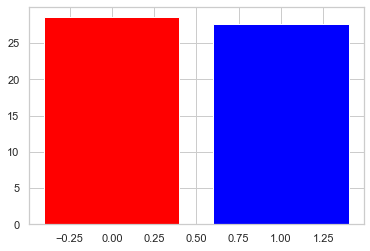

graph for FGM


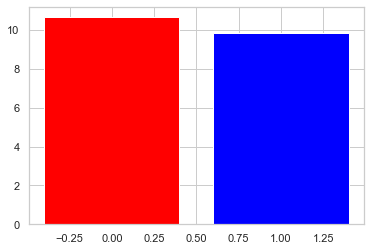

graph for FGA


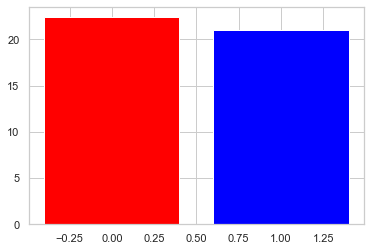

graph for 3PM


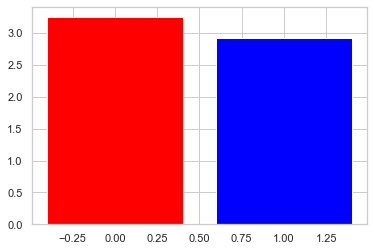

graph for 3PA


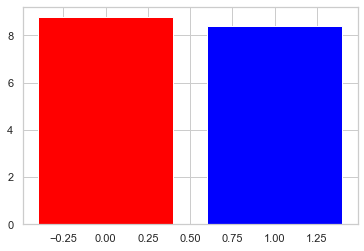

graph for FTM


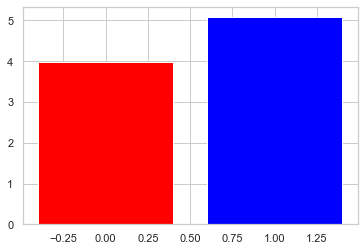

graph for FTA


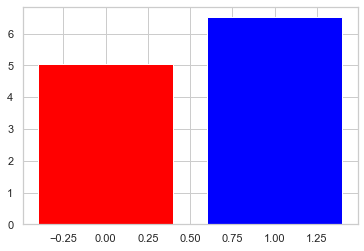

graph for OREB


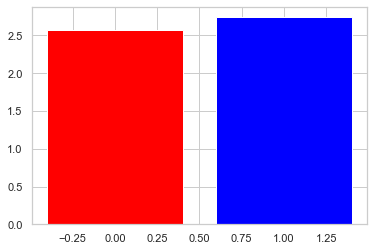

graph for DREB


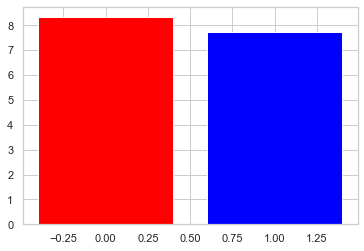

graph for REB


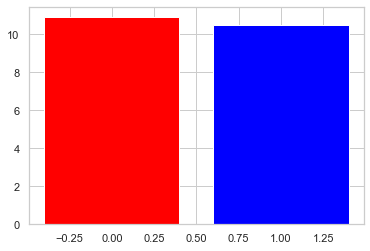

graph for AST


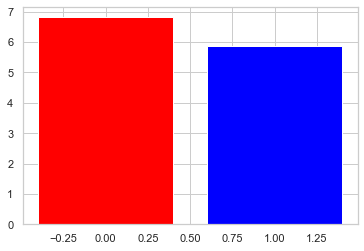

graph for TOV


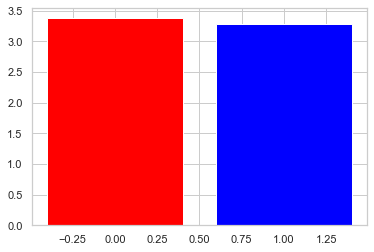

graph for STL


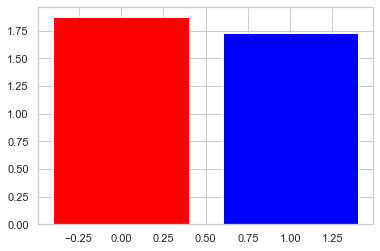

graph for BLK


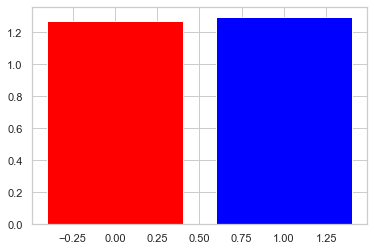

graph for PF


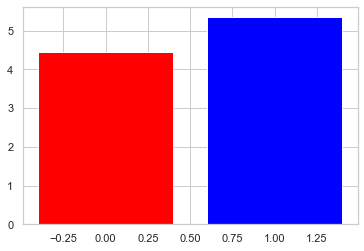

graph for +/-


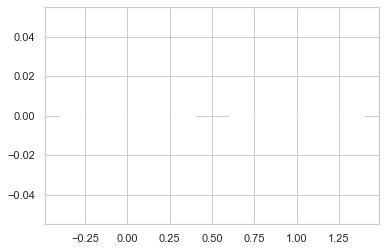

graph for OFFRTG


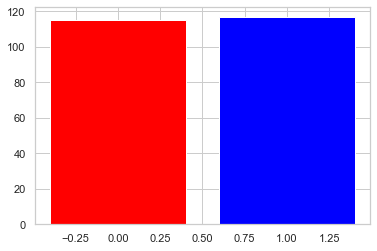

graph for DEFRTG


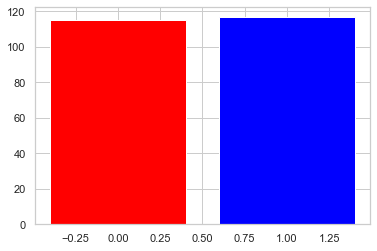

graph for Pace


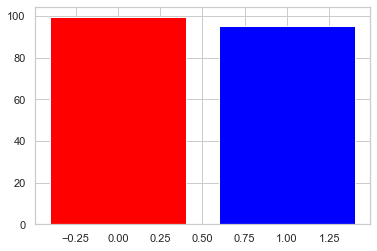

In [44]:
columns = ['PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-',"OFFRTG","DEFRTG","Pace"]
adv = ["OFFRTG","DEFRTG","Pace"]

for col in columns:
    if col in adv:
        stat_3 = first_3_comp[col].mean()
    else:    
        stat_3 = first_3_comp[col].mean() / 3
    stat_4 = NBA_4th_comp[col].mean()
    sns.set(style = "whitegrid")
    print("graph for %s" % (col))
    plt.bar(range(2), [stat_3, stat_4], color = ['red', 'blue'])
    plt.show()



Only differences are in the 4th quarter are more PF and FTA, in the first 3 quarters are more AST

graph for FGM


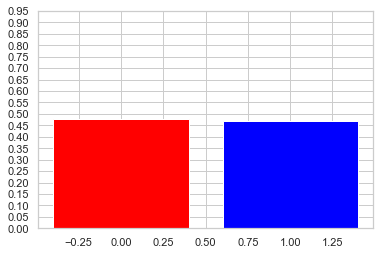

graph for 3PM


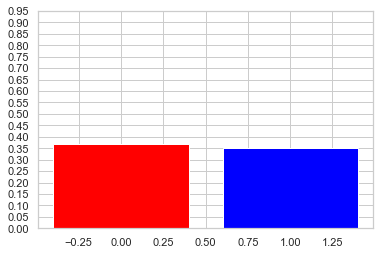

graph for FTM


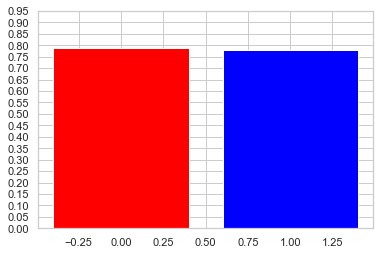

In [45]:
made = ['FGM', '3PM',  'FTM']
attempt = ['FGA', '3PA', 'FTA']      
for m,a in zip(made, attempt):
    stats_3 = first_3_comp[m].sum() / first_3_comp[a].sum()
    stats_4 = NBA_4th_comp[m].sum() / NBA_4th_comp[a].sum()
    sns.set(style = "whitegrid")
    print("graph for %s" % (m))
    plt.bar(range(2), [stats_3,stats_4], color=['red', 'blue'])
    plt.yticks(np.arange(0, 1, 0.05))
    plt.show()  

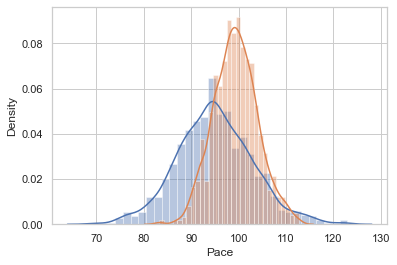

In [46]:
sns.distplot(NBA_4th_comp.Pace)
sns.distplot(first_3_comp.Pace)
plt.show()

In [47]:
first_3_comp["PTS/Q"] = first_3_comp["PTS"] / 3
a = NBA_4th_comp.pivot_table(index = 'week_of_season', values = "PTS", aggfunc = np.mean)
b = first_3_comp.pivot_table(index = 'week_of_season', values = "PTS/Q", aggfunc = np.mean)

scoring droped a little bit in the 4th

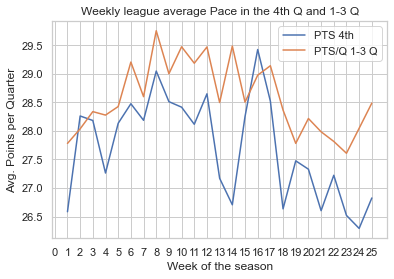

In [48]:
sns.set(style = "whitegrid")
plt.plot(a.index, a.PTS)
plt.plot(b.index,b["PTS/Q"])
plt.legend(["PTS 4th", "PTS/Q 1-3 Q"])
plt.title("Weekly league average Pace in the 4th Q and 1-3 Q")
plt.xlabel("Week of the season")
plt.ylabel("Avg. Points per Quarter")
plt.xticks(range(0, 26))
plt.show()

In [49]:
c = NBA_4th_comp.pivot_table(index = 'week_of_season', values = "Pace", aggfunc = np.mean)
d = first_3_comp.pivot_table(index = 'week_of_season', values = "Pace", aggfunc = np.mean)

We can explain the lower points with less possessions

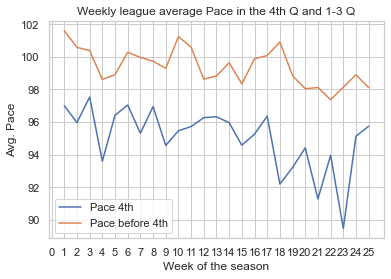

In [50]:
sns.set(style = "whitegrid")
plt.plot(c.index,c.Pace)
plt.plot(d.index,d.Pace)
plt.legend(["Pace 4th", "Pace before 4th"])
plt.title("Weekly league average Pace in the 4th Q and 1-3 Q")
plt.xlabel("Week of the season")
plt.ylabel("Avg. Pace")
plt.xticks(range(0, 26))
plt.show()

In [51]:
e = NBA_4th_comp.pivot_table(index = 'week_of_season', values = "OFFRTG", aggfunc = np.mean)
f = first_3_comp.pivot_table(index = 'week_of_season', values = "OFFRTG", aggfunc = np.mean)

OFF/DEF RTG don´t look like they´re significantly different

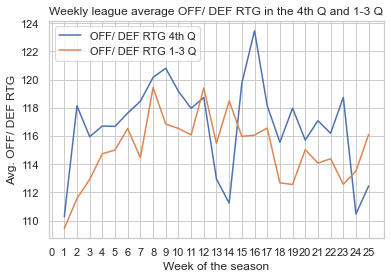

In [53]:
sns.set(style = "whitegrid")
plt.plot(e.index,e.OFFRTG)
plt.plot(f.index,f.OFFRTG)
plt.legend(["OFF/ DEF RTG 4th Q","OFF/ DEF RTG 1-3 Q"])
plt.title("Weekly league average OFF/ DEF RTG in the 4th Q and 1-3 Q")
plt.xlabel("Week of the season")
plt.ylabel("Avg. OFF/ DEF RTG")
plt.xticks(range(0, 26))
plt.show()

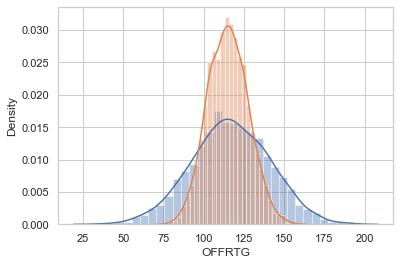

In [54]:
sns.distplot(NBA_4th_comp.OFFRTG)
sns.distplot(first_3_comp.OFFRTG)
plt.show()

## Individual team trends

Adv team stats in the 4th

In [55]:
teams_4th = NBA_4th_comp.pivot_table(index = "TEAM",values = ["OFFRTG","DEFRTG","Pace"], aggfunc = np.mean)
teams_4th["NetRTG"] = teams_4th["OFFRTG"] - teams_4th["DEFRTG"]

Adv team stats for the first 3 qaurters

In [56]:
teams_f3 = first_3_comp.pivot_table(index = "TEAM",values = ["OFFRTG","DEFRTG","Pace"],aggfunc = np.mean)
teams_f3["NetRTG"] = teams_f3["OFFRTG"] - teams_f3["DEFRTG"]

#### Compares NetRtg in first 3 and the 4th quarter
- Denver Nuggets, Minnesota Timberwolves, and Portland Trail Blazers get significant worse
- Milwaukee Bucks and Phoenix Suns stepped up in the 4th quarter
- Washington Wizards only improved in the 4th because of really bad NetRTG in the first 3
- On the other hand, Philadelphia 76ers and Miami Heat didn´t improve much because their NetRTG was very high in the first 3 quarters

In [57]:
teams_4th[["f3OFFRTG", "f3DEFRTG", "f3Pace", "f3NetRTG"]] = teams_f3[["OFFRTG", "DEFRTG", "Pace", "NetRTG"]]
teams_4th["difNetRTG"] = teams_4th["NetRTG"] - teams_4th["f3NetRTG"]
teams_4th

,DEFRTG,OFFRTG,Pace,NetRTG,f3OFFRTG,f3DEFRTG,f3Pace,f3NetRTG,difNetRTG
TEAM,,,,,,,,,
ATL,119.521360,117.226451,97.971862,-2.294909,118.099391,119.079685,100.674237,-0.980294,-1.314615
BKN,116.530290,116.822819,94.294380,0.292529,113.507262,115.072300,97.826564,-1.565038,1.857567
BOS,114.179364,118.974564,91.482658,4.795200,121.705534,113.140146,98.307619,8.565388,-3.770188
CHA,120.792651,118.644274,94.897374,-2.148377,109.893448,118.156950,97.994777,-8.263502,6.115125
CHI,120.344191,118.987953,93.928239,-1.356238,114.266850,115.683230,96.927195,-1.416380,0.060142
CLE,114.656883,116.373629,92.516747,1.716746,114.127385,112.581918,98.814272,1.545467,0.171279
DAL,117.847457,118.221220,95.285814,0.373763,116.327075,116.163985,100.653586,0.163090,0.210673
DEN,112.865414,117.902310,92.922663,5.036896,118.386920,114.194702,97.672487,4.192218,0.844678
DET,118.299949,111.720484,96.471547,-6.579465,111.380757,117.069504,100.461705,-5.688747,-0.890718


Difference between home and at the road

In [58]:
teams_4th_C = NBA_4th_comp.pivot_table(index = ["TEAM", "COURT"], values = ["OFFRTG", "DEFRTG", "Pace"], aggfunc = np.mean)
teams_4th_C["NetRTG"] = teams_4th_C["OFFRTG"] - teams_4th_C["DEFRTG"]

In [59]:
teams_f3_C = first_3_comp.pivot_table(index = ["TEAM", "COURT"], values = ["OFFRTG", "DEFRTG", "Pace"], aggfunc = np.mean)
teams_f3_C["NetRTG"] = teams_f3_C["OFFRTG"] - teams_f3_C["DEFRTG"]

Most teams improved their 4th quarter NetRTG at home

In [60]:
teams_4th_C[["f3OFFRTG", "f3DEFRTG", "f3Pace", "f3NetRTG"]] = teams_f3_C[["OFFRTG", "DEFRTG", "Pace", "NetRTG"]]
teams_4th_C["difNetRTG"] = teams_4th_C["NetRTG"] - teams_4th_C["f3NetRTG"]
teams_4th_C

DEFRTG      OFFRTG        Pace     NetRTG    f3OFFRTG  \
TEAM COURT                                                              
ATL  0      115.569096  111.154644   98.308097  -4.414452  116.434515   
     1      123.057596  122.659120   97.671020  -0.398476  119.589016   
BKN  0      123.832875  117.134593   93.612734  -6.698282  110.901663   
     1      109.996398  116.543863   94.904273   6.547466  115.838587   
BOS  0      118.559550  117.026066   90.312882  -1.533484  119.221304   
     1      109.361160  121.117912   92.769412  11.756753  124.438187   
CHA  0      123.830219  122.413865   95.348068  -1.416354  108.005185   
     1      118.247662  115.485968   94.519765  -2.761694  111.475505   
CHI  0      124.439238  119.753060   92.928472  -4.686178  116.313507   
     1      116.249145  118.222846   94.928006   1.973701  112.220192   
CLE  0      111.966728  109.947325   92.669766  -2.019403  112.486923   
     1      116.838090  121.584145   92.392678   4.746055  115.457489   
DAL  0      119.114547  116.375285   95.710687  -2.739262  117.998697   
     1      116.461577  120.240212   94.821109   3.778634  114.498738   
DEN  0      114.890035  115.501112   92.476726   0.611077  116.581682   
     1      110.448930  120.768256   93.454910  10.319325  120.541558   
DET  0      115.540095  115.524568   96.076217  -0.015527  110.573709   
     1      120.753153  108.339077   96.822951 -12.414077  112.098133   
GSW  0      120.058779  120.216591   96.371559   0.157812  118.411027   
     1      120.465391  119.734724   95.825801  -0.730667  118.201015   
HOU  0      112.383453  117.087721   96.417882   4.704268  111.348095   
     1      117.929723  116.948180   95.884945  -0.981544  112.915995   
IND  0      119.564052  119.487209   99.143614  -0.076843  121.274174   
     1      114.605464  118.922115   97.760997   4.316651  120.886887   
LAC  0      125.007103  127.340273   93.938275   2.333170  116.268869   
     1      114.879141  116.309571   95.489853   1.430430  117.988524   
LAL  0      113.806598  116.628516   95.452594   2.821918  114.113669   
     1      117.598540  115.725261   94.959908  -1.873279  117.040643   
MEM  0      106.798708  119.857395   94.866447  13.058687  107.856338   
     1      112.996044  106.408423   94.006429  -6.587621  106.475443   
MIA  0      110.877740  105.340451   92.229426  -5.537289  113.569166   
     1      122.988608  110.980892   94.321065 -12.007717  115.940002   
MIL  0      118.544654  123.036194   95.998197   4.491540  114.850425   
     1      120.760385  122.526746   99.740030   1.766361  118.542151   
MIN  0      113.255664  116.655263   93.956612   3.399600  115.610553   
     1      109.563484  116.706898   94.747439   7.143413  113.621339   
NOP  0      121.801991  121.987963   93.062255   0.185972  116.037123   
     1      115.796155  109.184628   92.972709  -6.611526  115.063563   
NYK  0      109.216058  116.894444   94.808078   7.678385  118.170129   
     1      117.247720  122.779989   91.468657   5.532269  114.542757   
OKC  0      115.280336  122.805535   96.359473   7.525200  114.324077   
     1      117.946596  124.886287   95.360709   6.939691  119.659771   
ORL  0      112.690338  113.408502   92.620640   0.718164  111.473206   
     1      109.934374  117.246276   93.948426   7.311902  115.672640   
PHI  0      120.840898  117.813111   94.704666  -3.027787  116.656722   
     1      112.342853  115.824994   96.499639   3.482141  116.331600   
PHX  0      112.858797  108.535809   90.690839  -4.322988  119.471933   
     1      120.891158  113.276417   94.462661  -7.614741  117.962714   
POR  0      105.733688  105.053112   94.125966  -0.680576  112.002898   
     1      119.483994  108.844558   92.346478 -10.639436  112.494400   
SAC  0      116.112694  115.874423   94.338549  -0.238271  117.015251   
     1      124.890675  116.063197   94.958433  -8.827478  117.103919   
SAS  0      118.725011  118.395878   98.775577  -0.329133  108.801342   
 

Four different quadrants: 
1. Teams ahead after 3rd and win the game 
2. Teams behind after 3rd and win the game 
3. Teams behind after 3rd and lose the game
4. Teams ahead after 3rd and lose

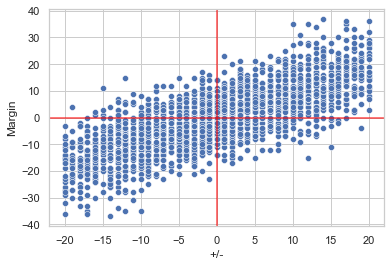

In [61]:
g = sns.scatterplot(first_3_comp["+/-"], NBA_4th_comp.Margin)
g.axhline(NBA_4th_comp.Margin.mean(), color = "red", alpha = 0.7)
g.axvline(0, color = "red", alpha = 0.7)
plt.show()

In [62]:
first_3_comp.to_csv("data/first_3_comp.csv",index = False)
NBA_4th_comp.to_csv("data/NBA_4th_comp.csv",index = False)